In [1]:
import pandas as pd
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [62]:
from keras import models 
from keras import layers 
import matplotlib.pyplot as plt
%matplotlib inline
import os

## Data

In [105]:
train_data_dir = 'chest_xray/train'
val_data_dir = 'chest_xray/val'
test_data_dir = 'chest_xray/test'

In [106]:
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir, target_size=(64,64), batch_size=5216)
test_generator = ImageDataGenerator().flow_from_directory(test_data_dir, target_size=(64,64), batch_size=624)
val_generator = ImageDataGenerator().flow_from_directory(val_data_dir, target_size=(64,64), batch_size=16)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [66]:
# check for class imbalance 
from collections import Counter
train_counter = Counter(train_generator.classes)
print('train:', train_counter)
test_counter = Counter(test_generator.classes)
print('test:', test_counter)

train: Counter({1: 3875, 0: 1341})
test: Counter({1: 390, 0: 234})


In [67]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

In [107]:
val_images, val_labels = next(val_generator)

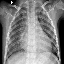

In [76]:
array_to_img(train_images[1])

In [77]:
train_labels[1]

array([0., 1.], dtype=float32)

## Preprocessing

In [108]:
print('train:', train_images.shape, train_labels.shape)
print('test:', test_images.shape, test_labels.shape)
print('val:', val_images.shape, val_labels.shape)

train: (5216, 64, 64, 3) (5216, 2)
test: (624, 64, 64, 3) (624, 2)
val: (16, 64, 64, 3) (16, 2)


In [130]:
#preprocessing images
train_unrow = train_images.reshape(5216,-1)

In [131]:
train_unrow.shape

(5216, 12288)

In [132]:
test_unrow = test_images.reshape(624, -1)
test_unrow.shape

(624, 12288)

In [133]:
val_unrow = val_images.reshape(16, -1)
val_unrow.shape

(16, 12288)

In [78]:
#preprocessing labels
train_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [79]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [177]:
train_label_final = np.reshape(train_labels[:,1], (5216,1))

In [178]:
np.shape(train_label_final)

(5216, 1)

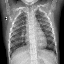

In [146]:
array_to_img(train_images[0])

In [147]:
# value 0 = normal, value 1 = pneumonia 
train_label_final[0]

array([0.], dtype=float32)

In [179]:
test_label_final = np.reshape(test_labels[:,1], (624,1))
np.shape(test_label_final)

(624, 1)

In [180]:
val_label_final = np.reshape(val_labels[:,1], (16,1))
np.shape(val_label_final)

(16, 1)

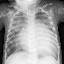

In [141]:
array_to_img(train_images[46])

In [142]:
#print(train_label_final.index[:,0])

In [148]:
train_label_final[46]

array([1.], dtype=float32)

### Data Normalization

In [151]:
#normalizing data
train_image_final = train_unrow/255
test_image_final = test_unrow/255
val_image_final = val_unrow/255

In [152]:
train_image_final.shape

(5216, 12288)

## Baseline model

In [206]:
np.random.seed(123)
base_model = models.Sequential()
base_model.add(layers.Dense(2000, activation='relu', input_shape=(12288,)))
base_model.add(layers.Dense(100, activation='relu'))
base_model.add(layers.Dense(1, activation='softmax'))

In [207]:
base_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [208]:
base_model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 2000)              24578000  
_________________________________________________________________
dense_31 (Dense)             (None, 100)               200100    
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 101       
Total params: 24,778,201
Trainable params: 24,778,201
Non-trainable params: 0
_________________________________________________________________


In [209]:
base_results = base_model.fit(train_image_final, train_label_final, epochs=10, 
                              batch_size=64, validation_data=(val_image_final, val_label_final))

Epoch 1/10
82/82 [==============================] - 11s 131ms/step - loss: nan - acc: 0.3675 - val_loss: nan - val_acc: 0.5000
Epoch 2/10
82/82 [==============================] - 11s 133ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 3/10
82/82 [==============================] - 10s 127ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 4/10
82/82 [==============================] - 11s 140ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 5/10
82/82 [==============================] - 11s 133ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 6/10
82/82 [==============================] - 11s 131ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 7/10
82/82 [==============================] - 12s 152ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 8/10
82/82 [==============================] - 12s 149ms/step - loss: nan - acc: 0.2571 - val_loss: nan - 

In [210]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

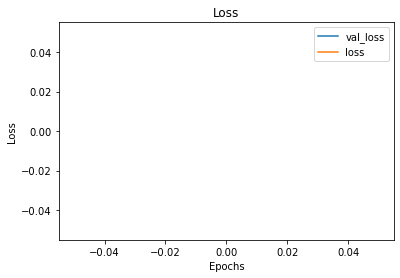

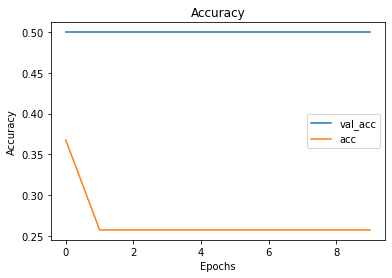

In [211]:
visualize_training_results(base_results)

In [224]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 64)              

In [225]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [226]:
results_1 = model.fit(train_images,
                    train_label_final,
                    epochs=100,
                    validation_data=(val_images, val_label_final))

Epoch 1/100
163/163 [==============================] - 42s 258ms/step - loss: 3.4283 - acc: 0.8875 - val_loss: 1.1044 - val_acc: 0.6250
Epoch 2/100
163/163 [==============================] - 35s 214ms/step - loss: 0.1410 - acc: 0.9482 - val_loss: 0.2006 - val_acc: 1.0000
Epoch 3/100
163/163 [==============================] - 34s 210ms/step - loss: 0.1085 - acc: 0.9599 - val_loss: 0.1795 - val_acc: 1.0000
Epoch 4/100
163/163 [==============================] - 37s 227ms/step - loss: 0.0939 - acc: 0.9647 - val_loss: 0.3648 - val_acc: 0.7500
Epoch 5/100
163/163 [==============================] - 40s 246ms/step - loss: 0.0887 - acc: 0.9674 - val_loss: 0.1992 - val_acc: 0.8750
Epoch 6/100
163/163 [==============================] - 39s 236ms/step - loss: 0.0815 - acc: 0.9688 - val_loss: 0.2995 - val_acc: 0.8125
Epoch 7/100
163/163 [==============================] - 42s 260ms/step - loss: 0.0696 - acc: 0.9728 - val_loss: 0.4526 - val_acc: 0.7500
Epoch 8/100
163/163 [===========================

163/163 [==============================] - 20s 126ms/step - loss: 2.2837e-05 - acc: 1.0000 - val_loss: 0.8860 - val_acc: 0.9375
Epoch 61/100
163/163 [==============================] - 21s 126ms/step - loss: 2.0277e-05 - acc: 1.0000 - val_loss: 0.9081 - val_acc: 0.9375
Epoch 62/100
163/163 [==============================] - 21s 127ms/step - loss: 1.8088e-05 - acc: 1.0000 - val_loss: 0.9150 - val_acc: 0.9375
Epoch 63/100
163/163 [==============================] - 22s 132ms/step - loss: 1.6007e-05 - acc: 1.0000 - val_loss: 0.9131 - val_acc: 0.9375
Epoch 64/100
163/163 [==============================] - 22s 136ms/step - loss: 1.4595e-05 - acc: 1.0000 - val_loss: 0.9237 - val_acc: 0.9375
Epoch 65/100
163/163 [==============================] - 21s 130ms/step - loss: 1.2869e-05 - acc: 1.0000 - val_loss: 0.9551 - val_acc: 0.9375
Epoch 66/100
163/163 [==============================] - 24s 144ms/step - loss: 1.1780e-05 - acc: 1.0000 - val_loss: 0.9518 - val_acc: 0.9375
Epoch 67/100
163/163 [====

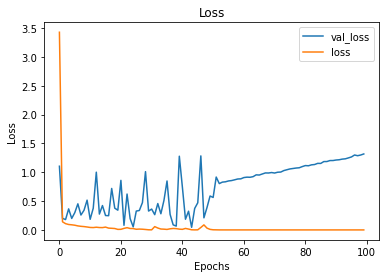

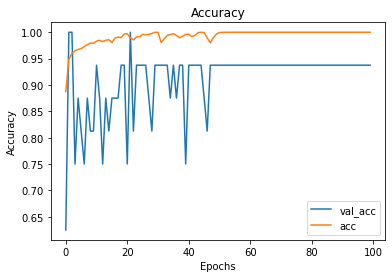

In [227]:
visualize_training_results(results_1)

In [229]:
results_1_train = model.evaluate(train_images, train_label_final)
results_1_train

163/163 [==============================] - 6s 38ms/step - loss: 4.2461e-07 - acc: 1.0000: 1s - los


[4.246057869750075e-07, 1.0]

In [230]:
results_1_test = model.evaluate(test_images, test_label_final)
results_1_test

20/20 [==============================] - 1s 32ms/step - loss: 6.4779 - acc: 0.7468


[6.477949619293213, 0.7467948794364929]

In [223]:
#CNN

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         1